# **NLP : Classifying AG News Using RNN with LSTM Architecture**

Project Created by : **Maulana Zulfikar Aziz**

E-mail : maulanazulfikarrz@gmail.com

## **Project Overview**

Berita dapat didefinisikan sebagai suatu informasi aktual yang menarik dan akurat serta dianggap penting bagi sejumlah besar pembaca, pendengar, maupun penonton [1]. Seiring dengan perkembangan digitalisasi, kita dapat dengan mudah memperoleh berita melalui berbagai platform online, seperti media sosial dan website. Banyaknya berita yang beredar di platform online kadangkala menyebabkan para pembaca kesulitan untuk mencari kategori berita yang sesuai dengan preferensi mereka. Ditambah isi dari suatu berita yang seringkali memuat lebih dari satu topik menjadikan suatu berita sulit untuk diklasifikasikan.

Klasifikasi teks merupakan salah satu bagian penting dalam ranah Natural Language Processing (NLP). Klasifikasi teks dapat diaplikasikan ke dalam berbagai bidang, seperti analisis sentimen, klasifikasi dokumen, kategorisasi teks dan penggalian informasi [2]. Salah satu pendekatan populer yang dapat digunakan untuk menyelesaikan permasalahan klasifikasi teks dalam NLP adalah Neural Network [2].

Dalam project ini, saya menggunakan Recurrent Neural Network dengan arsitektur LSTM (Long Short Term Memory) untuk menyelesaikan permasalahan klasifikasi berita dengan multi-kategori.

## **Business Understanding**

### Problem Statement (Pernyataan Masalah)

Banyaknya berita yang beredar di platform online kadangkala menyebabkan para pembaca kesulitan untuk mencari kategori berita yang sesuai dengan preferensi mereka. Ditambah isi dari suatu berita yang seringkali memuat lebih dari satu topik menjadikan suatu berita sulit untuk diklasifikasikan.

### Goals (Tujuan)

Membuat sebuah model Natural Language Processing (NLP) menggunakan RNN dengan arsitektur LSTM untuk mengklasifikasikan jenis berita.

### Solution Approaches

Untuk membuat sebuah model Natural Language Processing (NLP) menggunakan RNN dengan arsitektur LSTM, kita perlu melakukan beberapa tahapan, yaitu :    

1. Data Understanding

   Tahapan ini mencakup penjelasan awal tentang data, data loading, dan Exploratory Data Analysis (EDA).
  
2. Data Cleaning

   Setelah dilakukan proses eksplorasi data, tahap selanjutnya adalah membersihkan data yaitu menghilangkan noise pada data.

3. Data Preparation

   Sebelum melalui tahap pemodelan, data perlu disiapkan terlebih dahulu. Persiapan yang perlu dilakukan adalah membagi dataset menjadi data train dan data validasi, melakukan One-Hot Encoding pada data, melakukan tokenisasi, dan melakukan padding.

4. Modelling & Result

   Pada tahap ini, kita membuat sebuah model RNN dengan arsitektur LSTM lalu kita fit dengan menggunakan data train yang telah kita prepare sebelumnya.

5. Evaluation

   Model dievaluasi dengan menggunakan data test untuk mengetahui performa model jika diterapkan terhadap data yang belum pernah dilihat oleh model.

## **Data Understanding**

### About Data

Data yang digunakan pada project ini merupakan data AG News Classification Dataset yang dapat diunduh di : https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

AG adalah sekumpulan artikel berita yang berjumlah lebih dari 1 juta. Artikel berita tersebut telah dikumpulkan dari 2000 lebih sumber oleh ComeToMyHead dalam waktu lebih dari 1 tahun. ComeToMyHead adalah mesin pencari berita akademik yang telah berdiri sejak bulan Juli 2004.

Adapun kolom-kolom yang terdapat dalam dataset tersebut yaitu :     

`Class Index` :  Klasifikasi berita, dikategorikan menjadi 4 macam (1 = World, 2 = Sport, 3 = Business, 4 = Sci/Tech)

`Title` : Judul artikel berita

`Description` : Deskripsi artikel berita

Data training berukuran 120.000 baris dengan masing-masing kelas memiliki 40.000 baris. Sedangkan data test berukuran 7600 baris dengan masing-masing kelas memiliki 1900 baris.

### Import Libraries

In [40]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


plt.style.use("ggplot")

### Data Loading

Untuk mempermudah eksekusi di device lain, data telah diupload terlebih dahulu di Google Drive, dan akan diupload dalam notebook ini melalui link Google Drive.

In [1]:
! pip install --upgrade --no-cache-dir gdown

! gdown --id 11PNrWkIZ8WuULK8aUdiYkrEFz5g4lPg_

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11PNrWkIZ8WuULK8aUdiYkrEFz5g4lPg_
To: /content/Datasets.zip
100% 12.0M/12.0M [00:00<00:00, 33.8MB/s]


In [3]:
# Unzip dataset
zipdir = "Datasets.zip"
zip_open = zipfile.ZipFile(zipdir,"r")
zip_open.extractall("datasets/")
zip_open.close()

### Exploratory Data Analysis (EDA)

#### General Information

In [41]:
data = pd.read_csv("datasets/Datasets/train.csv")
data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [42]:
data.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

In [43]:
# Ubah nama kolom menjadi lebih sederhana
data.columns = ["Class","Title","Description"]
data.columns

Index(['Class', 'Title', 'Description'], dtype='object')

In [44]:
data["Class"].unique()

array([3, 4, 2, 1])

Sesuai dengan penjelasan sebelumnya, bahwa terdapat 4 kelas dalam kolom target.

#### Checking Distribution

Sebelum melangkah lebih lanjut, sebaiknya kita harus tahu terlebih dahulu bagaimana bentuk distribusi setiap kelasnya, untuk mengecek apakah terjadi kasus distribusi kelas yang tidak seimbang.

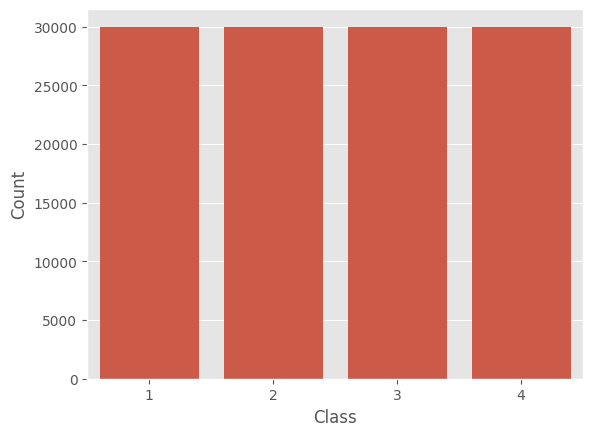

In [46]:
distribusi_label = data["Class"].value_counts()
sns.barplot(x=distribusi_label.index, y = distribusi_label)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Terlihat bahwa distribusi antar kelas sudah seimbang, jadi tidak perlu dilakukan upsampling/downsampling.

Selanjutnya, akan dicek distribusi jumlah kata untuk setiap item di dalam kolom "Description" berdasarkan kolom "Class"

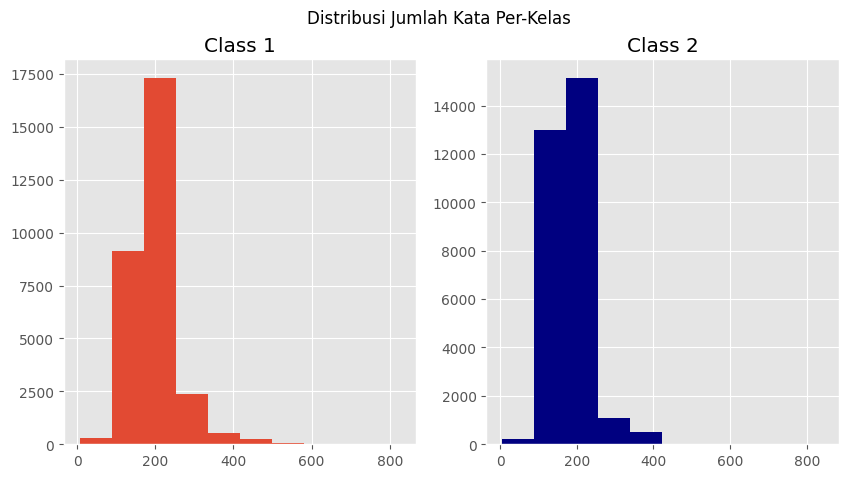

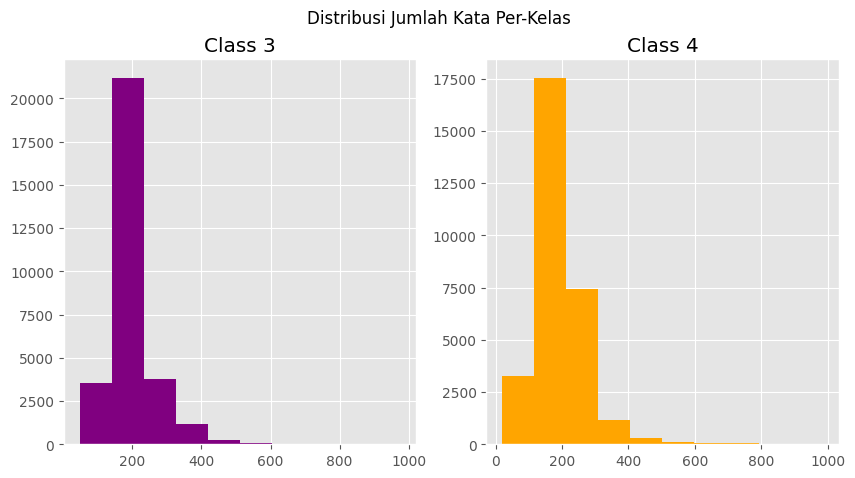

In [9]:
dist_1 = data[data["Class"]==1]["Description"].str.len()
dist_2 = data[data["Class"]==2]["Description"].str.len()
dist_3 = data[data["Class"]==3]["Description"].str.len()
dist_4 = data[data["Class"]==4]["Description"].str.len()


fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(dist_1)
ax1.set_title("Class 1")
ax2.hist(dist_2,color="navy")
ax2.set_title("Class 2")
fig1.suptitle("Distribusi Jumlah Kata Per-Kelas")

fig2, (ax3,ax4) = plt.subplots(1,2,figsize=(10,5))
ax3.hist(dist_3,color="purple")
ax3.set_title("Class 3")
ax4.hist(dist_4,color="orange")
ax4.set_title("Class 4")
fig2.suptitle("Distribusi Jumlah Kata Per-Kelas")


plt.show()

Terlihat bahwa rata-rata jumlah kata per-kelas adalah sebanyak kurang lebih 200 kata.

Selanjutnya, akan dilakukan pengecekan 10 kata (tidak termasuk stopwords) yang paling sering muncul untuk setiap kelasnya.

In [14]:
nltk.download('stopwords')
stopwords_set = set(stopwords.words("english"))

def create_corpus(Class) :
  corpus = []
  for list_words in data[data["Class"]==Class]["Description"].str.split() :
    for word in list_words :
      word = word.lower()
      corpus.append(word)
  return corpus

def topten_words(Class) :
  corpus = create_corpus(Class)
  counter = Counter(corpus)
  most_common = counter.most_common()

  words = []
  counts = []

  for word, count in most_common[:40] :
    if word not in stopwords_set :
      words.append(word)
      counts.append(count)
    if len(words) == 10 :
      break

  sns.barplot(x=counts,y=words)
  plt.title(Class)
  plt.show()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


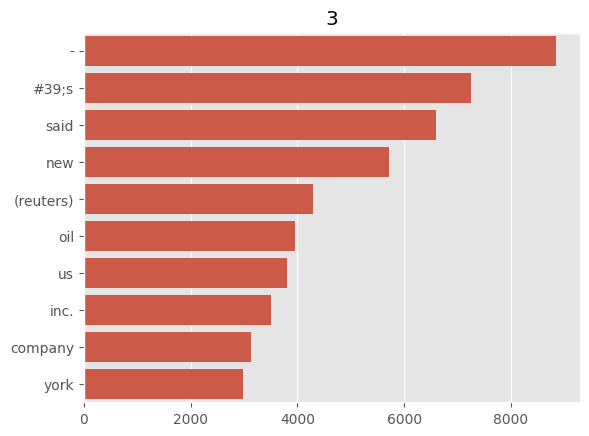

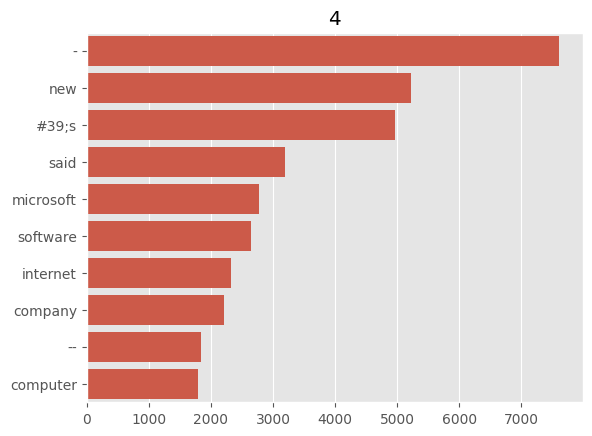

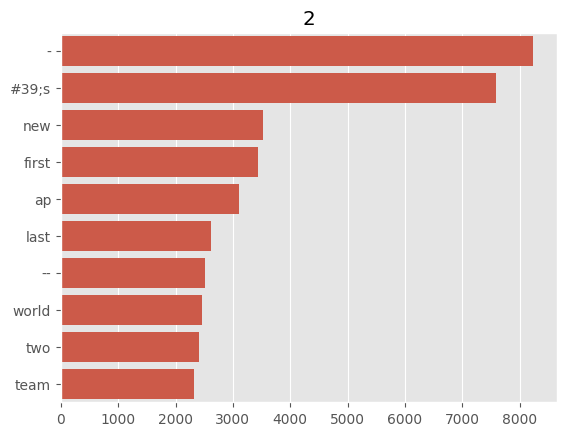

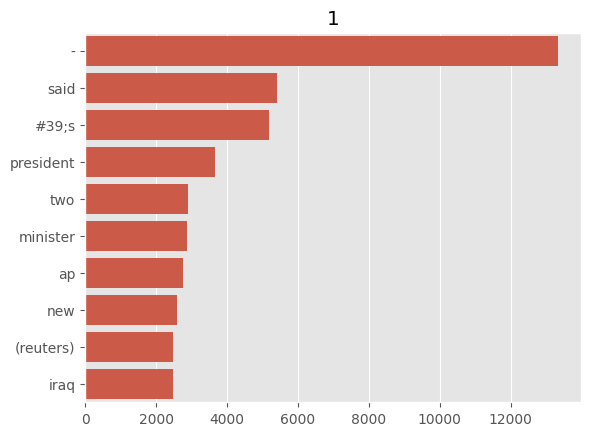

In [15]:
for Class in data["Class"].unique() :
  topten_words(Class)

Terlihat ada banyak kata yang tidak diperlukan selain stopwords, yaitu tanda baca. Masalah ini akan diselesaikan pada bagian Data Cleaning.

## **Data Cleaning**

Dalam bagian Data Cleaning, akan dilakukan penghapusan tanda baca dan stopwords pada kolom "Description"

In [16]:
# Menghapus tanda baca pada kolom Description
def delete_punct(text) :
  table = str.maketrans('','',string.punctuation)
  return text.translate(table)

data["Description"] = data["Description"].map(lambda x : delete_punct(x))

In [17]:
# Menghapus tanda baca pada kolom Description
def delete_stopwords(text) :
  final_text = []
  for word in text.split() :
    if word.strip().lower() not in stopwords_set :
      final_text.append(word.strip().lower())
  return " ".join(final_text)

data["Description"] = data["Description"].map(lambda x : delete_stopwords(x))

## **Data Preparation**

Dalam bagian ini, data akan diproses agar bisa digunakan untuk modelling. Persiapan yang perlu dilakukan adalah melakukan One-Hot Encoding pada data, membagi dataset menjadi data train dan data validasi, melakukan tokenisasi, dan melakukan padding.

In [19]:
# One-Hot Encoding
df = data.copy()

category = pd.get_dummies(df["Class"])
df = pd.concat([df,category],axis=1)
df = df.drop(columns=["Class","Title"])
df.head()

,Description,1,2,3,4
0,reuters shortsellers wall streets dwindlingban...,0,0,1,0
1,reuters private investment firm carlyle groupw...,0,0,1,0
2,reuters soaring crude prices plus worriesabout...,0,0,1,0
3,reuters authorities halted oil exportflows mai...,0,0,1,0
4,afp tearaway world oil prices toppling records...,0,0,1,0


In [20]:
# Split menjadi data train dan data validasi dengan rasio 80:20
X = df["Description"].values
y = df[[1,2,3,4]].values

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
# Buat dataframe dari data train
data_train = np.column_stack((X_train,y_train))
data_train = pd.DataFrame(data_train,columns=["Description","1","2","3","4"])
print("Shape :",data_train.shape)
data_train.head()

Shape : (96000, 5)


,Description,1,2,3,4
0,25 million people along water asked evacuate l...,1,0,0,0
1,celtic silenced critics last night fair chunk ...,0,1,0,0
2,washington legislation would expand definition...,0,0,0,1
3,carilyn shropshire pittsburgh postgazette scri...,0,0,0,1
4,computer bellwether ibm signed sevenyear 500 m...,0,0,0,1


In [22]:
# Buat dataframe dari data validasi
data_val = np.column_stack((X_val,y_val))
data_val = pd.DataFrame(data_val,columns=["Description","1","2","3","4"])
print("Shape :",data_val.shape)
data_val.head()

Shape : (24000, 5)


,Description,1,2,3,4
0,burlingame calif bea systems expanding open so...,0,0,0,1
1,oil prices forced higher today outbreak violen...,0,0,1,0
2,muddy waters still occupied heart gonaives las...,1,0,0,0
3,ap survey crews searching woods neighborhoods ...,0,0,0,1
4,bad stern stopped 30 games ron artests indiana...,0,1,0,0


In [23]:
# Proses tokenisasi
tokenizer = Tokenizer(num_words=2000,oov_token="<oov_token>")
tokenizer.fit_on_texts(X_train)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_val = tokenizer.texts_to_sequences(X_val)

padded_train = pad_sequences(sequence_train,
                            maxlen=150,
                            padding="post",
                            truncating="post")

padded_val = pad_sequences(sequence_val,
                            maxlen=150,
                            padding="post",
                            truncating="post")

## **Modelling and Result**

Dalam project ini, saya menggunakan model RNN dengan arsitektur LSTM. RNN merupakan merupakan suatu metode dalam deep learning yang digunakan untuk memproses data sekuensial dengan pemanggilan berulang. RNN digunakan dengan arsitektur LSTM yang memiliki memory cells untuk dapat menyimpan informasi dengan jangka waktu yang panjang sehingga dapat mencegah terjadinya kasus vanishing gradient.

In [24]:
model = tf.keras.Sequential([
    Embedding(input_dim=2000, output_dim=100),
    LSTM(128,return_sequences=True),
    LSTM(64,return_sequences=True),
    GlobalMaxPooling1D(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')
])

In [26]:
# Definisikan Callbacks
checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)


early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=5,
    min_delta=0.0001,
    mode="min",
    verbose=1
)

In [27]:
# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

In [29]:
# Fit model
num_epochs = 20
history = model.fit(
    padded_train,
    y_train,
    epochs=num_epochs,
    validation_data=(padded_val, y_val),
    batch_size=64,
    callbacks = [checkpoint, early_stopping, reduce_lr],
    verbose=2)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.38959, saving model to best_model.h5
1500/1500 - 48s - loss: 0.5270 - accuracy: 0.8033 - val_loss: 0.3896 - val_accuracy: 0.8670 - lr: 0.0010 - 48s/epoch - 32ms/step
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.38959 to 0.35447, saving model to best_model.h5
1500/1500 - 22s - loss: 0.3680 - accuracy: 0.8757 - val_loss: 0.3545 - val_accuracy: 0.8747 - lr: 0.0010 - 22s/epoch - 15ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.35447 to 0.34038, saving model to best_model.h5
1500/1500 - 23s - loss: 0.3393 - accuracy: 0.8848 - val_loss: 0.3404 - val_accuracy: 0.8789 - lr: 0.0010 - 23s/epoch - 16ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.34038 to 0.33983, saving model to best_model.h5
1500/1500 - 23s - loss: 0.3204 - accuracy: 0.8899 - val_loss: 0.3398 - val_accuracy: 0.8765 - lr: 0.0010 - 23s/epoch - 16ms/step
Epoch 5/20

Epoch 5: val_loss improved from 0.33983 to 0.33961, saving model to best_model.h5
1500/1500 - 22s - loss: 0.2999 - accuracy: 0.8963 - val_loss: 0.3396 - val_accuracy: 0.8817 - lr: 0.0010 - 22s/epoch - 15ms/step
Epoch 6/20

Epoch 6: val_loss did not improve from 0.33961
1500/1500 - 22s - loss: 0.2822 - accuracy: 0.9026 - val_loss

Didapatkan model yang akan digunakan adalah model pada Epoch 5

Epoch 5: val_loss improved from 0.33983 to 0.33961, saving model to best_model.h5
1500/1500 - 22s - loss: 0.2999 - accuracy: 0.8963 - val_loss: 0.3396 - val_accuracy: 0.8817 - lr: 0.0010 - 22s/epoch - 15ms/step

In [30]:
# Save the model
model.save("My_Best_Model.h5")

## **Evaluation**

In [32]:
loss, acc = model.evaluate(padded_val,y_val)
print("Loss :",loss)
print("Accuracy :",acc)

750/750 [==============================] - 6s 7ms/step - loss: 0.3396 - accuracy: 0.8817
Loss : 0.3396054208278656
Accuracy : 0.8817499876022339


Terlihat bahwa model yang dibuat menghasilkan akurasi sekitar 88% pada data validasi.

### Plotting Accuracy and Loss of Model

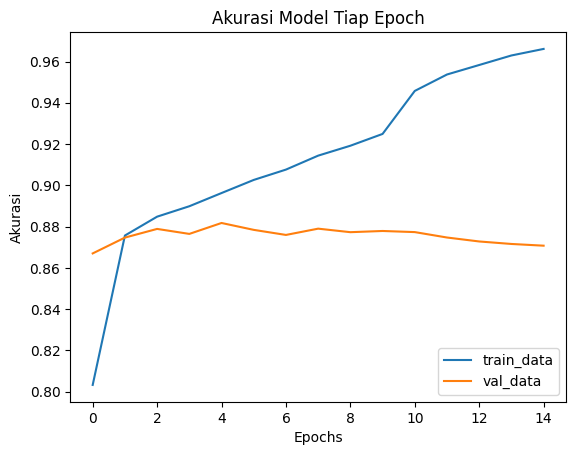

In [33]:
# Plotting model accuracy
plt.style.use("default")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Akurasi Model Tiap Epoch")
plt.xlabel("Epochs")
plt.ylabel("Akurasi")
plt.legend(["train_data","val_data"],loc="lower right")

Dari grafik, terlihat bahwa semakin banyak epochs yang dijalankan, akurasi model pada data train meningkat akan tetapi akurasi pada data validasi menurun. Hal ini mengindikasikan adanya Overfitting pada model, callback Checkpoint telah membantu untuk mengambil model yang terbaik, yaitu pada Epoch ke-5.

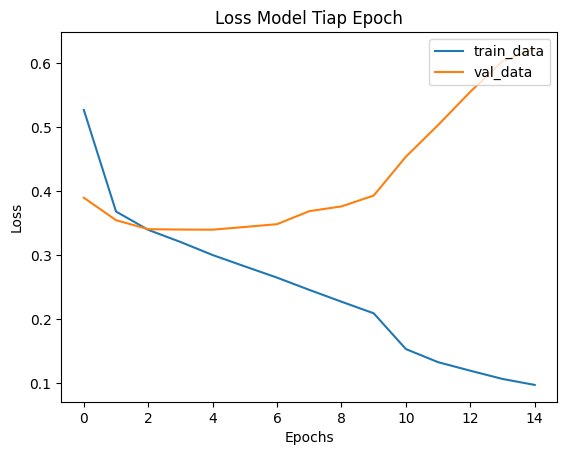

In [34]:
# Plotting model loss
plt.style.use("default")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss Model Tiap Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train_data","val_data"],loc="upper right")

Berdasarkan grafik, terlihat bahwa semakin banyak Epochs yang dijalankan, loss dari data train semakin turun dan loss dari data validasi semakin naik. Didapatkan kesimpulan yang sama, yaitu model mengalami Overfitting.

### Evaluation on Data Test

In [35]:
data_test = pd.read_csv("datasets/Datasets/test.csv")
data_test

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [36]:
# Data Preparation for data test
category = pd.get_dummies(data_test["Class Index"])
data_test = pd.concat([data_test,category],axis=1)
data_test.drop(columns=["Class Index","Title"],inplace=True)
data_test

,Description,1,2,3,4
0,Unions representing workers at Turner Newall...,0,0,1,0
1,"SPACE.com - TORONTO, Canada -- A second\team o...",0,0,0,1
2,AP - A company founded by a chemistry research...,0,0,0,1
3,AP - It's barely dawn when Mike Fitzpatrick st...,0,0,0,1
4,AP - Southern California's smog-fighting agenc...,0,0,0,1
...,...,...,...,...,...
7595,Ukrainian presidential candidate Viktor Yushch...,1,0,0,0
7596,With the supply of attractive pitching options...,0,1,0,0
7597,Like Roger Clemens did almost exactly eight ye...,0,1,0,0
7598,SINGAPORE : Doctors in the United States have ...,0,0,1,0


In [37]:
# Tokenization and padding for data test
X = data_test["Description"].values
y = data_test[[1,2,3,4]].values

sequence = tokenizer.texts_to_sequences(X)

padded = pad_sequences(sequence,
                            maxlen=50,
                            padding="post",
                            truncating="post")

In [38]:
# Model evaluation on data test
loss, acc = model.evaluate(padded,y)
print("Loss :",loss)
print("Accuracy :",acc)

238/238 [==============================] - 4s 11ms/step - loss: 0.3788 - accuracy: 0.8705
Loss : 0.3787582218647003
Accuracy : 0.8705263137817383


Model yang telah dibuat menghasilkan akurasi sebesar 87% pada data test.

## **Conclusion**

Sebuah model Natural Language Processing (NLP) menggunakan RNN dengan arsitektur LSTM untuk mengklasifikasikan jenis berita berhasil dibuat dengan akurasi sebesar 88% pada data validasi dan 87% pada data test. Besaran akurasi ini sudah cukup tinggi, akan tetapi akan lebih bagus lagi jika berada di atas 90%. Metode-metode lain terkait klasifikasi teks dalam NLP mungkin saja bisa digunakan untuk meningkatkan akurasi pada model.

## **References**

1. Alfando and R. Hayami, "Klasifikasi Teks Berbahasa Indonesia Menggunakan Machine Learning dan Deep Learning : Studi Literatur," Jurnal Mahasiswa Teknik Informatika, vol. 7, no. 1, pp. 681-686, 2023.

2. W. K. Sari, D. P. Rini, R. F. Malik and I. S. B. Azhar, "Sequential Models for Text Classification Using Recurrent Neural Network," Advances in Intelligent Systems Research, vol. 172, pp. 333-340, 2020.

3. http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html

4. Y. Fauziyah, R. Ilyaz and F. Kasyidi, "Mesin Penterjemah Bahasa Indonesia-Bahasa Sunda Menggunakan Recurrent Neural Networks," Jurnal Teknoninfo, vol. 16, no. 2, pp. 313-322, 2022.

5. https://ilmudatapy.com/one-hot-encoding-di-python/